## GPM Data Collection Script

#### This script fetches the current data collection submission files, consolidates them in to a combined csv file, and outputs that to the network.
- All source files stored in the path are read, summarized, and then consolidated into a single dataframe named 'df'.
- This process assumes that the multiple sources are in no way duplicates of each other.
- df is then output in the data collection subfolder of the "Production" folder.


### User Variables
- These are overwritten if inherited from run_control.ipynb.
- Feel Free to reset them for a manual run if you like
- Do not save without percode = "-f"

In [1]:

commit_message = "Development and testing."
# Give a brief reason for the run.

run_control = 1
#run_type = 0 - Lite run with no reporting, not recommended.
#run_type = 1 - Lite run with normal reporting, default setting.
#run_type = 2 - Heavy run with full reporting, available for audits and troubleshooting.
#run_type = 5 - A default setting. Indicates the script is being run by an outside process without an inherited value

percode = "2021.Q1"
# Data Collection Code, this controls file paths and output names
# "-f" is the value indicatine a bad inheritence from run with arg


In [2]:
# Parameters
run_control = 1
percode = "20XX.QX"
commit_message = "New German Data."
inst_datetime = "05032021160934"


#### import packages

In [3]:
import os
import sys
from datetime import datetime
import getpass
#### Packages used
import json

import matplotlib.pyplot as plt
import openpyxl
import pandas as pd


In [4]:
inst_datetime = datetime.now().strftime("%m%d%Y%H%M%S")
# a single datetime stamp for the full instance run

#### Default Variables, these govern logic, do not edit.

In [5]:
default_rc = 0 #extra lite mode
dummy_perc = "33Q3" # bad inheritence

#### Script determining run context ie, manual, run_control.ipynb, or other.

In [6]:
if run_control == 5:
    run_control = default_rc 
else:
    run_control = run_control

try:
    if sys.argv[1] == "-f":
        percode = percode
    else:
        percode = sys.argv[1]

except IndexError:
    percode = default_DC
except NameError:
    percode = default_DC




#### Make paths for the source folder

In [7]:
rt_path = f'//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/{str(percode)}'
ls_path = os.path.join( rt_path, 'live_sources')


#### Get a list of only json files in the path that start with "us_dat".
- Make sure that you have 1 file per source in this folder.
    -  For instance, do not have two files for Portugal. If there is an update, archive the old one.
- Do not overwrite files in the archive.
    - Rename newly archived files, no strict convention, we keep track of these by the modified date.
- It is ok to have multiple sources in one json.

In [8]:
files = os.listdir(ls_path)
files = [files.lower() for files in files]
files_json = [f for f in files if f[:6] == 'us_dat']

#### Create a list 'pathfiles' that has every json source file with the full path.

In [9]:
pathfiles = []

for f in files_json:
    makepathsfiles = os.path.join(str(ls_path), str(f))
    pathfiles.append(makepathsfiles)


#### Read each json file into temp DataFrame "data".
#### Prep actions - Strip (trim) leading and trailing spaces values in string columns, remove rows without business units.
#### Append each json output to into 1 DataFrame "df".
#### Process Cleanup, the indices restart with each append, reset and drop the previous.

In [10]:
df = pd.DataFrame()

for f in pathfiles:
    data = pd.read_json(f, orient="table")
    data.columns = data.columns.str.strip()
    data = data[data['Business Unit'].notnull()]
    df = df.append(data)

df = df.reset_index(drop=True)

## Summary Steps - user output reporting for each json file.

#### Upload Charts

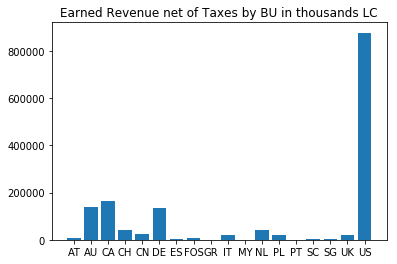

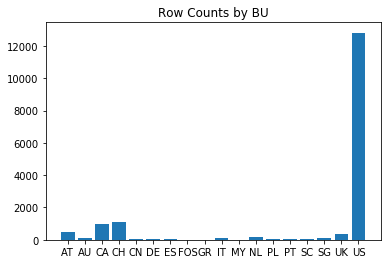

In [11]:
def num_format(x):
    """number format without a currency"""
    return "{:,.0f}".format(x)

if run_control > 0:

    sumdata = df.groupby(['Business Unit']).sum()
    sumdata = sumdata.reset_index()
    plt.bar(sumdata['Business Unit'], sumdata['Earned Revenues net of Taxes']/1000)
    plt.title('Earned Revenue net of Taxes by BU in thousands LC')
    plt.show()

    countdata = df.groupby(['Business Unit']).count()
    countdata = countdata.reset_index()
    plt.bar(countdata['Business Unit'], countdata['Earned Revenues net of Taxes'])
    plt.title('Row Counts by BU')
    plt.show()

else:
    print("Charts Skipped")

#### Raw files.

In [12]:
if run_control > 1:
    for f in pathfiles:
        with open(f, 'r') as json_file:
            json_object = json.load(json_file)
        print(json.dumps(json_object, indent=1))

else:
    print("Audit Report 1 Skipped")

Audit Report 1 Skipped


#### First 5 rows of each file.

In [13]:
if run_control > 0:

    for f in pathfiles:
        data = pd.read_json(f, orient="table")
        print(os.path.join(str(f), "  - First 5 Samples:"))
        print("-" * 100)
        print(data.head())
else:
    print("Default Report 2 Skipped")

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat01212021163424.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency                       Region  \
0            UK      UK      GBP  Western Europe, LATAM & MEA   
1            UK      UK      GBP  Western Europe, LATAM & MEA   
2            UK      UK      GBP  Western Europe, LATAM & MEA   
3            UK      UK      GBP  Western Europe, LATAM & MEA   
4            UK      UK      GBP  Western Europe, LATAM & MEA   

  Reporting Date From Reporting Date To Date of Analysis  \
0          2019-10-01        2020-09-30       2020-12-06   
1          2019-10-01        2020-09-30       2020-12-06   
2          2019-10-01        2020-09-30       2020-12-06   
3          2019-10-01        2020-09-30       2020-12-06   
4          2019-10-01        20

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat11272020121509.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency         Region Reporting Date From  \
0            CA      CA      CAD  North America          2019-10-01   
1            CA      CA      CAD  North America          2019-10-01   
2            CA      CA      CAD  North America          2019-10-01   
3            CA      CA      CAD  North America          2019-10-01   
4            CA      CA      CAD  North America          2019-10-01   

  Reporting Date To Date of Analysis         Type of Analysis  \
0        2020-09-30       2020-11-30  Most Recently 12 Months   
1        2020-09-30       2020-11-30  Most Recently 12 Months   
2        2020-09-30       2020-11-30  Most Recently 12 Months   
3        2020-09-30       2020-11-3

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat11302020100416.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency                       Region  \
0            IT      IT      EUR  Western Europe, LATAM & MEA   
1            IT      IT      EUR  Western Europe, LATAM & MEA   
2            IT      IT      EUR  Western Europe, LATAM & MEA   
3            IT      IT      EUR  Western Europe, LATAM & MEA   
4            IT      IT      EUR  Western Europe, LATAM & MEA   

  Reporting Date From Reporting Date To Date of Analysis  \
0          2019-10-01        2020-09-30       2020-11-04   
1          2019-10-01        2020-09-30       2020-11-04   
2          2019-10-01        2020-09-30       2020-11-04   
3          2019-10-01        2020-09-30       2020-11-04   
4          2019-10-01        20

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12012020122524.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency                       Region  \
0            NL      NL      EUR  Western Europe, LATAM & MEA   
1            NL      NL      EUR  Western Europe, LATAM & MEA   
2            NL      NL      EUR  Western Europe, LATAM & MEA   
3            NL      NL      EUR  Western Europe, LATAM & MEA   
4            NL      NL      EUR  Western Europe, LATAM & MEA   

  Reporting Date From Reporting Date To Date of Analysis  \
0          2019-10-01        2020-09-30       2020-11-30   
1          2019-10-01        2020-09-30       2020-11-30   
2          2019-10-01        2020-09-30       2020-11-30   
3          2019-10-01        2020-09-30       2020-11-30   
4          2019-10-01        20

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12012020133806.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency                           Region  \
0            DE      DE      EUR  North, Central & Eastern Europe   
1            DE      DE      EUR  North, Central & Eastern Europe   
2            DE      DE      EUR  North, Central & Eastern Europe   
3            DE      DE      EUR  North, Central & Eastern Europe   
4            DE      DE      EUR  North, Central & Eastern Europe   

  Reporting Date From Reporting Date To Date of Analysis  \
0          2019-10-01        2020-09-30       2020-11-27   
1          2019-10-01        2020-09-30       2020-11-27   
2          2019-10-01        2020-09-30       2020-11-27   
3          2019-10-01        2020-09-30       2020-11-27   
4      

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12012020172407.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency                       Region  \
0            SC      SE      EUR  Western Europe, LATAM & MEA   
1            SC      SE      EUR  Western Europe, LATAM & MEA   
2            SC      DK      EUR  Western Europe, LATAM & MEA   
3            SC      DK      EUR  Western Europe, LATAM & MEA   
4            SC      NO      EUR  Western Europe, LATAM & MEA   

  Reporting Date From Reporting Date To Date of Analysis  \
0          2019-10-01        2020-09-30       2020-11-30   
1          2019-10-01        2020-09-30       2020-11-30   
2          2019-10-01        2020-09-30       2020-11-30   
3          2019-10-01        2020-09-30       2020-11-30   
4          2019-10-01        20

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12042020112641.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency         Region Reporting Date From  \
0            US      US      USD  North America          2019-10-01   
1            US      US      USD  North America          2019-10-01   
2            US      US      USD  North America          2019-10-01   
3            US      US      USD  North America          2019-10-01   
4            US      US      USD  North America          2019-10-01   

  Reporting Date To Date of Analysis         Type of Analysis  \
0        2020-09-30       2020-10-31  Most Recently 12 Months   
1        2020-09-30       2020-10-31  Most Recently 12 Months   
2        2020-09-30       2020-10-31  Most Recently 12 Months   
3        2020-09-30       2020-10-3

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12072020110229.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency                           Region  \
0            PL      PL      EUR  North, Central & Eastern Europe   
1            PL      PL      EUR  North, Central & Eastern Europe   
2            PL      PL      EUR  North, Central & Eastern Europe   
3            PL      PL      EUR  North, Central & Eastern Europe   
4            PL      PL      EUR  North, Central & Eastern Europe   

  Reporting Date From Reporting Date To Date of Analysis  \
0          2019-10-01        2020-09-30       2020-11-20   
1          2019-10-01        2020-09-30       2020-11-20   
2          2019-10-01        2020-09-30       2020-11-20   
3          2019-10-01        2020-09-30       2020-11-20   
4      

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12102020141147.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency                       Region  \
0            ES      ES      EUR  Western Europe, LATAM & MEA   
1            ES      ES      EUR  Western Europe, LATAM & MEA   
2            ES      ES      EUR  Western Europe, LATAM & MEA   
3            ES      ES      EUR  Western Europe, LATAM & MEA   
4            ES      ES      EUR  Western Europe, LATAM & MEA   

  Reporting Date From Reporting Date To Date of Analysis Type of Analysis  \
0          2020-01-01        2020-09-30       2020-11-30     Year To Date   
1          2020-01-01        2020-09-30       2020-11-30     Year To Date   
2          2020-01-01        2020-09-30       2020-11-30     Year To Date   
3          2020-01-01  

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12102020142300.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency                       Region  \
0            PT      PT      EUR  Western Europe, LATAM & MEA   
1            PT      PT      EUR  Western Europe, LATAM & MEA   
2            PT      PT      EUR  Western Europe, LATAM & MEA   
3            PT      PT      EUR  Western Europe, LATAM & MEA   
4            PT      PT      EUR  Western Europe, LATAM & MEA   

  Reporting Date From Reporting Date To Date of Analysis Type of Analysis  \
0          2020-01-01        2020-09-30       2020-11-30     Year To Date   
1          2020-01-01        2020-09-30       2020-11-30     Year To Date   
2          2020-01-01        2020-09-30       2020-11-30     Year To Date   
3          2020-01-01  

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12112020170307.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency                           Region  \
0            GR      GR      EUR  North, Central & Eastern Europe   
1            GR      GR      EUR  North, Central & Eastern Europe   
2            GR      GR      EUR  North, Central & Eastern Europe   
3            GR      GR      EUR  North, Central & Eastern Europe   
4            GR      GR      EUR  North, Central & Eastern Europe   

  Reporting Date From Reporting Date To Date of Analysis  \
0          2019-10-01        2020-09-30       2020-11-30   
1          2019-10-01        2020-09-30       2020-11-30   
2          2019-10-01        2020-09-30       2020-11-30   
3          2019-10-01        2020-09-30       2020-11-30   
4      

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_australia-dupe_removed_data_file.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency Region Reporting Date From Reporting Date To  \
0            AU      AU      AUD   APAC          2019-10-01        2020-09-30   
1            AU      AU      AUD   APAC          2019-10-01        2020-09-30   
2            AU      AU      AUD   APAC          2019-10-01        2020-09-30   
3            AU      AU      AUD   APAC          2019-10-01        2020-09-30   
4            AU      AU      AUD   APAC          2019-10-01        2020-09-30   

  Date of Analysis         Type of Analysis  Analysed Months  Reporting Year  \
0       2020-11-30  Most Recently 12 Months               12            2020   
1       2020-11-30 

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_austria_data_file.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency                           Region  \
0            AT      AT      EUR  North, Central & Eastern Europe   
1            AT      AT      EUR  North, Central & Eastern Europe   
2            AT      AT      EUR  North, Central & Eastern Europe   
3            AT      AT      EUR  North, Central & Eastern Europe   
4            AT      AT      EUR  North, Central & Eastern Europe   

  Reporting Date From Reporting Date To Date of Analysis Type of Analysis  \
0          2020-01-01        2020-09-30       2020-11-30     Year To Date   
1          2020-01-01        2020-09-30       2020-11-30     Year To Date   
2          2020-01-01        2020-0

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_fos_data_file.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency                       Region  \
0           FOS     FOS      EUR  Western Europe, LATAM & MEA   
1           FOS     FOS      EUR  Western Europe, LATAM & MEA   
2           FOS     FOS      EUR  Western Europe, LATAM & MEA   
3           FOS     FOS      EUR  Western Europe, LATAM & MEA   
4           FOS     FOS      EUR  Western Europe, LATAM & MEA   

  Reporting Date From Reporting Date To Date of Analysis  \
0          2019-10-01        2020-09-30       2020-10-13   
1          2019-10-01        2020-09-30       2020-10-13   
2          2019-10-01        2020-09-30       2020-10-13   
3          2019-10-01        2020-09-30       2020-10-

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_gcn_sent_data_file.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency Region Reporting Date From Reporting Date To  \
0            CN      CN      RMB   APAC          2019-10-01        2020-09-30   
1            CN      CN      RMB   APAC          2019-10-01        2020-09-30   
2            CN      CN      RMB   APAC          2019-10-01        2020-09-30   
3            CN      CN      RMB   APAC          2019-10-01        2020-09-30   
4            CN      CN      RMB   APAC          2019-10-01        2020-09-30   

  Date of Analysis         Type of Analysis  Analysed Months  Reporting Year  \
0       2020-11-07  Most Recently 12 Months               12            2020   
1       2020-11-07  Most Recently

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_sg_my_sent_data_file.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency Region Reporting Date From Reporting Date To  \
0            SG      SG      SGD   APAC          2019-10-01        2020-09-30   
1            SG      SG      SGD   APAC          2019-10-01        2020-09-30   
2            SG      SG      SGD   APAC          2019-10-01        2020-09-30   
3            SG      SG      SGD   APAC          2019-10-01        2020-09-30   
4            SG      SG      SGD   APAC          2019-10-01        2020-09-30   

  Date of Analysis Type of Analysis  Analysed Months  Reporting Year  ...  \
0       2020-10-30     Year To Date               12            2019  ...   
1       2020-10-30     Year To Date  

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datswiss_transformations_202011.json\  - First 5 Samples:
----------------------------------------------------------------------------------------------------
  Business Unit Country Currency                           Region  \
0            CH      CH      CHF  North, Central & Eastern Europe   
1            CH      CH      CHF  North, Central & Eastern Europe   
2            CH      CH      CHF  North, Central & Eastern Europe   
3            CH      CH      CHF  North, Central & Eastern Europe   
4            CH      CH      CHF  North, Central & Eastern Europe   

  Reporting Date From Reporting Date To Date of Analysis  \
0          2019-10-01        2020-09-30       2020-11-26   
1          2019-10-01        2020-09-30       2020-11-26   
2          2019-10-01        2020-09-30       2020-11-26   
3          2019-10-01        2020-09-30       2020-11

#### Summary Statisitics.

In [14]:
if run_control > 0:
    for f in pathfiles:
        data = pd.read_json(f, orient="table")
        print(os.path.join(str(f), "  - Statistical summary:"))
        print("-" * 100)
        print(data.describe())
else:
    print("Default Report 3 Skipped")

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat01212021163424.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count            346.0           346.0              346.0            346.0   
mean              12.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min               12.0          2020.0                3.0              9.0   
25%               12.0          2020.0                3.0              9.0   
50%               12.0          2020.0                3.0              9.0   
75%               12.0          2020.0                3.0              9.0   
max               12.0          2020.0                3.0              9.0   

       Number o

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat11272020121509.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count           1001.0          1001.0             1001.0           1001.0   
mean              12.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min               12.0          2020.0                3.0              9.0   
25%               12.0          2020.0                3.0              9.0   
50%               12.0          2020.0                3.0              9.0   
75%               12.0          2020.0                3.0              9.0   
max               12.0          2020.0                3.0              9.0   

       Earned R

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat11302020100416.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count             98.0            98.0               98.0             98.0   
mean              12.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min               12.0          2020.0                3.0              9.0   
25%               12.0          2020.0                3.0              9.0   
50%               12.0          2020.0                3.0              9.0   
75%               12.0          2020.0                3.0              9.0   
max               12.0          2020.0                3.0              9.0   

       Number o

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12012020122524.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count            176.0           176.0              176.0            176.0   
mean              12.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min               12.0          2020.0                3.0              9.0   
25%               12.0          2020.0                3.0              9.0   
50%               12.0          2020.0                3.0              9.0   
75%               12.0          2020.0                3.0              9.0   
max               12.0          2020.0                3.0              9.0   

       Number o

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12012020133806.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count             57.0            57.0               57.0             57.0   
mean              12.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min               12.0          2020.0                3.0              9.0   
25%               12.0          2020.0                3.0              9.0   
50%               12.0          2020.0                3.0              9.0   
75%               12.0          2020.0                3.0              9.0   
max               12.0          2020.0                3.0              9.0   

       Written 

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12012020172407.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count             39.0            39.0               39.0             39.0   
mean              12.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min               12.0          2020.0                3.0              9.0   
25%               12.0          2020.0                3.0              9.0   
50%               12.0          2020.0                3.0              9.0   
75%               12.0          2020.0                3.0              9.0   
max               12.0          2020.0                3.0              9.0   

       Number o

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12042020112641.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count          12815.0         12815.0            12815.0          12815.0   
mean              12.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min               12.0          2020.0                3.0              9.0   
25%               12.0          2020.0                3.0              9.0   
50%               12.0          2020.0                3.0              9.0   
75%               12.0          2020.0                3.0              9.0   
max               12.0          2020.0                3.0              9.0   

       Number o

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12072020110229.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count             29.0            29.0               29.0             29.0   
mean              12.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min               12.0          2020.0                3.0              9.0   
25%               12.0          2020.0                3.0              9.0   
50%               12.0          2020.0                3.0              9.0   
75%               12.0          2020.0                3.0              9.0   
max               12.0          2020.0                3.0              9.0   

       Number o

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12102020141147.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count             51.0            51.0               51.0             51.0   
mean               9.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min                9.0          2020.0                3.0              9.0   
25%                9.0          2020.0                3.0              9.0   
50%                9.0          2020.0                3.0              9.0   
75%                9.0          2020.0                3.0              9.0   
max                9.0          2020.0                3.0              9.0   

       Number o

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12102020142300.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count             64.0            64.0               64.0             64.0   
mean               9.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min                9.0          2020.0                3.0              9.0   
25%                9.0          2020.0                3.0              9.0   
50%                9.0          2020.0                3.0              9.0   
75%                9.0          2020.0                3.0              9.0   
max                9.0          2020.0                3.0              9.0   

       Number o

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12112020170307.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count             17.0            17.0               17.0             17.0   
mean              12.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min               12.0          2020.0                3.0              9.0   
25%               12.0          2020.0                3.0              9.0   
50%               12.0          2020.0                3.0              9.0   
75%               12.0          2020.0                3.0              9.0   
max               12.0          2020.0                3.0              9.0   

       Number o

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_australia-dupe_removed_data_file.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count             91.0            91.0               91.0             91.0   
mean              12.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min               12.0          2020.0                3.0              9.0   
25%               12.0          2020.0                3.0              9.0   
50%               12.0          2020.0                3.0              9.0   
75%               12.0          2020.0                3.0              9.0   
max               12.0          2020.0

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_austria_data_file.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count            699.0           699.0              699.0            699.0   
mean               9.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min                9.0          2020.0                3.0              9.0   
25%                9.0          2020.0                3.0              9.0   
50%                9.0          2020.0                3.0              9.0   
75%                9.0          2020.0                3.0              9.0   
max                9.0          2020.0               

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_fos_data_file.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count              5.0             5.0                5.0              5.0   
mean              12.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min               12.0          2020.0                3.0              9.0   
25%               12.0          2020.0                3.0              9.0   
50%               12.0          2020.0                3.0              9.0   
75%               12.0          2020.0                3.0              9.0   
max               12.0          2020.0                3.0

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_gcn_sent_data_file.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count             61.0            61.0               61.0             61.0   
mean              12.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min               12.0          2020.0                3.0              9.0   
25%               12.0          2020.0                3.0              9.0   
50%               12.0          2020.0                3.0              9.0   
75%               12.0          2020.0                3.0              9.0   
max               12.0          2020.0              

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_sg_my_sent_data_file.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------
       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count             96.0       96.000000          96.000000        96.000000   
mean              12.0     2019.750000           2.500000         7.500000   
std                0.0        0.435286           1.123903         3.371709   
min               12.0     2019.000000           1.000000         3.000000   
25%               12.0     2019.750000           1.750000         5.250000   
50%               12.0     2020.000000           2.500000         7.500000   
75%               12.0     2020.000000           3.250000         9.750000   
max               12.0     2020.000000           4

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datswiss_transformations_202011.json\  - Statistical summary:
----------------------------------------------------------------------------------------------------


       Analysed Months  Reporting Year  Reporting Quarter  Reporting Month  \
count           1096.0          1096.0             1096.0           1096.0   
mean              12.0          2020.0                3.0              9.0   
std                0.0             0.0                0.0              0.0   
min               12.0          2020.0                3.0              9.0   
25%               12.0          2020.0                3.0              9.0   
50%               12.0          2020.0                3.0              9.0   
75%               12.0          2020.0                3.0              9.0   
max               12.0          2020.0                3.0              9.0   

       Number of Products per Row  Number of B-Partners per Row  \
count                      1096.0                   1096.000000   
mean                          1.0                     25.614964   
std                           0.0                     79.304278   
min                          

#### Null Value Report.

In [15]:
if run_control > 0:
    for f in pathfiles:
        data = pd.read_json(f, orient="table")
        print(os.path.join(str(f), "  - Null values in the dataset:"))
        print("-" * 100)
        print(data.isnull().sum())
else:
    print("Default Report 4 Skipped")

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat01212021163424.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit                     0
Country                           0
Currency                          0
Region                            0
Reporting Date From               0
                                 ..
expsub                            0
Reporting Date From INT           0
Reporting Date To INT             0
Date of Analysis INT              0
Selected Fields for Duplicates    0
Length: 72, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat11272020121509.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit                     0
Country                           0
Currency                          0
Region                            0
Reporting Date From               0
                                 ..
expsub                            0
Reporting Date From INT           0
Reporting Date To INT             0
Date of Analysis INT              0
Selected Fields for Duplicates    0
Length: 72, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat11302020100416.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit                     0
Country                           0
Currency                          0
Region                            0
Reporting Date From               0
                                 ..
expsub                            0
Reporting Date From INT           0
Reporting Date To INT             0
Date of Analysis INT              0
Selected Fields for Duplicates    0
Length: 72, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12012020122524.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit                     0
Country                           0
Currency                          0
Region                            0
Reporting Date From               0
                                 ..
expsub                            0
Reporting Date From INT           0
Reporting Date To INT             0
Date of Analysis INT              0
Selected Fields for Duplicates    0
Length: 72, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12012020133806.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit                     0
Country                           0
Currency                          0
Region                            0
Reporting Date From               0
                                 ..
expsub                            0
Reporting Date From INT           0
Reporting Date To INT             0
Date of Analysis INT              0
Selected Fields for Duplicates    0
Length: 72, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12012020172407.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit                     0
Country                           0
Currency                          0
Region                            0
Reporting Date From               0
                                 ..
expsub                            0
Reporting Date From INT           0
Reporting Date To INT             0
Date of Analysis INT              0
Selected Fields for Duplicates    0
Length: 72, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12042020112641.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit                     0
Country                           0
Currency                          0
Region                            0
Reporting Date From               0
                                 ..
expsub                            0
Reporting Date From INT           0
Reporting Date To INT             0
Date of Analysis INT              0
Selected Fields for Duplicates    0
Length: 75, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12072020110229.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit                     0
Country                           0
Currency                          0
Region                            0
Reporting Date From               0
                                 ..
expsub                            0
Reporting Date From INT           0
Reporting Date To INT             0
Date of Analysis INT              0
Selected Fields for Duplicates    0
Length: 72, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12102020141147.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit                     0
Country                           0
Currency                          0
Region                            0
Reporting Date From               0
                                 ..
expsub                            0
Reporting Date From INT           0
Reporting Date To INT             0
Date of Analysis INT              0
Selected Fields for Duplicates    0
Length: 72, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12102020142300.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit                     0
Country                           0
Currency                          0
Region                            0
Reporting Date From               0
                                 ..
expsub                            0
Reporting Date From INT           0
Reporting Date To INT             0
Date of Analysis INT              0
Selected Fields for Duplicates    0
Length: 72, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12112020170307.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit                     0
Country                           0
Currency                          0
Region                            0
Reporting Date From               0
                                 ..
expsub                            0
Reporting Date From INT           0
Reporting Date To INT             0
Date of Analysis INT              0
Selected Fields for Duplicates    0
Length: 72, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_australia-dupe_removed_data_file.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit           0
Country                 0
Currency                0
Region                  0
Reporting Date From     0
                       ..
Commission Ratio        2
Expense Ratio           2
Combined Ratio          0
Profit or Loss          0
Notes                  91
Length: 65, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_austria_data_file.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit            0
Country                  0
Currency                 0
Region                   0
Reporting Date From      0
                      ... 
Commission Ratio       246
Expense Ratio          246
Combined Ratio           0
Profit or Loss           0
Notes                  699
Length: 65, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_fos_data_file.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit                     0
Country                           0
Currency                          0
Region                            0
Reporting Date From               0
                                 ..
expsub                            0
Reporting Date From INT           0
Reporting Date To INT             0
Date of Analysis INT              0
Selected Fields for Duplicates    0
Length: 72, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_gcn_sent_data_file.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit           0
Country                 0
Currency                0
Region                  0
Reporting Date From     0
                       ..
Commission Ratio        8
Expense Ratio           8
Combined Ratio          0
Profit or Loss          0
Notes                  61
Length: 65, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_sg_my_sent_data_file.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit           0
Country                 0
Currency                0
Region                  0
Reporting Date From     0
                       ..
Commission Ratio       32
Expense Ratio          32
Combined Ratio          0
Profit or Loss          0
Notes                  96
Length: 65, dtype: int64


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datswiss_transformations_202011.json\  - Null values in the dataset:
----------------------------------------------------------------------------------------------------
Business Unit                       0
Country                             0
Currency                            0
Region                              0
Reporting Date From                 0
                                 ... 
expsub                            135
Reporting Date From INT             0
Reporting Date To INT               0
Date of Analysis INT                0
Selected Fields for Duplicates      0
Length: 72, dtype: int64


#### Datatypes by file.


In [16]:
if run_control > 0:
    for f in pathfiles:
        data = pd.read_json(f, orient="table")
        print(os.path.join(str(f), "  - Datatypes:"))
        print("-" * 100)
        print(data.dtypes)
else:
    print("Default Report 5 Skipped")

//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat01212021163424.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                             object
Country                                   object
Currency                                  object
Region                                    object
Reporting Date From               datetime64[ns]
                                       ...      
expsub                                    object
Reporting Date From INT                    int64
Reporting Date To INT                      int64
Date of Analysis INT                       int64
Selected Fields for Duplicates            object
Length: 72, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat11272020121509.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                             object
Country                                   object
Currency                                  object
Region                                    object
Reporting Date From               datetime64[ns]
                                       ...      
expsub                                    object
Reporting Date From INT                    int64
Reporting Date To INT                      int64
Date of Analysis INT                       int64
Selected Fields for Duplicates            object
Length: 72, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat11302020100416.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                             object
Country                                   object
Currency                                  object
Region                                    object
Reporting Date From               datetime64[ns]
                                       ...      
expsub                                    object
Reporting Date From INT                    int64
Reporting Date To INT                      int64
Date of Analysis INT                       int64
Selected Fields for Duplicates            object
Length: 72, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12012020122524.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                             object
Country                                   object
Currency                                  object
Region                                    object
Reporting Date From               datetime64[ns]
                                       ...      
expsub                                   float64
Reporting Date From INT                    int64
Reporting Date To INT                      int64
Date of Analysis INT                       int64
Selected Fields for Duplicates            object
Length: 72, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12012020133806.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                             object
Country                                   object
Currency                                  object
Region                                    object
Reporting Date From               datetime64[ns]
                                       ...      
expsub                                   float64
Reporting Date From INT                    int64
Reporting Date To INT                      int64
Date of Analysis INT                       int64
Selected Fields for Duplicates            object
Length: 72, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12012020172407.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                             object
Country                                   object
Currency                                  object
Region                                    object
Reporting Date From               datetime64[ns]
                                       ...      
expsub                                   float64
Reporting Date From INT                    int64
Reporting Date To INT                      int64
Date of Analysis INT                       int64
Selected Fields for Duplicates            object
Length: 72, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12042020112641.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                             object
Country                                   object
Currency                                  object
Region                                    object
Reporting Date From               datetime64[ns]
                                       ...      
expsub                                    object
Reporting Date From INT                    int64
Reporting Date To INT                      int64
Date of Analysis INT                       int64
Selected Fields for Duplicates            object
Length: 75, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12072020110229.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                             object
Country                                   object
Currency                                  object
Region                                    object
Reporting Date From               datetime64[ns]
                                       ...      
expsub                                   float64
Reporting Date From INT                    int64
Reporting Date To INT                      int64
Date of Analysis INT                       int64
Selected Fields for Duplicates            object
Length: 72, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12102020141147.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                             object
Country                                   object
Currency                                  object
Region                                    object
Reporting Date From               datetime64[ns]
                                       ...      
expsub                                   float64
Reporting Date From INT                    int64
Reporting Date To INT                      int64
Date of Analysis INT                       int64
Selected Fields for Duplicates            object
Length: 72, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12102020142300.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                             object
Country                                   object
Currency                                  object
Region                                    object
Reporting Date From               datetime64[ns]
                                       ...      
expsub                                    object
Reporting Date From INT                    int64
Reporting Date To INT                      int64
Date of Analysis INT                       int64
Selected Fields for Duplicates            object
Length: 72, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_dat12112020170307.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                             object
Country                                   object
Currency                                  object
Region                                    object
Reporting Date From               datetime64[ns]
                                       ...      
expsub                                   float64
Reporting Date From INT                    int64
Reporting Date To INT                      int64
Date of Analysis INT                       int64
Selected Fields for Duplicates            object
Length: 72, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_australia-dupe_removed_data_file.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                  object
Country                        object
Currency                       object
Region                         object
Reporting Date From    datetime64[ns]
                            ...      
Commission Ratio              float64
Expense Ratio                 float64
Combined Ratio                float64
Profit or Loss                float64
Notes                         float64
Length: 65, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_austria_data_file.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                  object
Country                        object
Currency                       object
Region                         object
Reporting Date From    datetime64[ns]
                            ...      
Commission Ratio              float64
Expense Ratio                 float64
Combined Ratio                float64
Profit or Loss                float64
Notes                         float64
Length: 65, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_fos_data_file.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                             object
Country                                   object
Currency                                  object
Region                                    object
Reporting Date From               datetime64[ns]
                                       ...      
expsub                                   float64
Reporting Date From INT                    int64
Reporting Date To INT                      int64
Date of Analysis INT                       int64
Selected Fields for Duplicates            object
Length: 72, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_gcn_sent_data_file.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                  object
Country                        object
Currency                       object
Region                         object
Reporting Date From    datetime64[ns]
                            ...      
Commission Ratio              float64
Expense Ratio                 float64
Combined Ratio                float64
Profit or Loss                float64
Notes                         float64
Length: 65, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datportfolio_monitoring_template_q3_2020_sg_my_sent_data_file.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                  object
Country                        object
Currency                       object
Region                         object
Reporting Date From    datetime64[ns]
                            ...      
Commission Ratio              float64
Expense Ratio                 float64
Combined Ratio                float64
Profit or Loss                float64
Notes                         float64
Length: 65, dtype: object


//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/Data Collection/Production/20XX.QX\live_sources\us_datswiss_transformations_202011.json\  - Datatypes:
----------------------------------------------------------------------------------------------------
Business Unit                             object
Country                                   object
Currency                                  object
Region                                    object
Reporting Date From               datetime64[ns]
                                       ...      
expsub                                   float64
Reporting Date From INT                    int64
Reporting Date To INT                      int64
Date of Analysis INT                       int64
Selected Fields for Duplicates            object
Length: 72, dtype: object


#### Output Processes
- Define File names.
- If existing csv is found, archive it in "raw_data_file_history" folder.
- Save new csv.

In [17]:
file = f'{str(percode)}.csv'
histfile = f'{str(percode)}_{inst_datetime}.csv'


try:
    os.rename(os.path.join(str(rt_path), file), os.path.join(str(rt_path), "raw_data_file_history/" , histfile))
except FileNotFoundError:
    pass

df.to_csv(os.path.join(str(rt_path), file), ',', index=False , encoding='utf-8-sig')

- Log update record with commit message and time.
- Determine commit message and make new entry

In [18]:
log = os.path.join(str(rt_path), f'pipline_log.csv' )

try:
    log_df = pd.read_csv(log)
except NameError:
    print("No log file present")

# determine if running from notebook or Excel controller and set commit message.
if sys.argv[1] == "-f":
    message = commit_message
else:
    piperunner = '//hecate/Insurance_US/Product Development/Product Management/Global PPM/Reporting/_To' \
                 'ols/GitHub/Production Repositories/Pipeline Runner/Pipeline Runner.xlsm'
    wb = openpyxl.load_workbook(piperunner)
    sh = wb['Pipeline Runner']
    message = sh['f13'].value

# find username
username = getpass.getuser()

# record timestamp
datetime = inst_datetime
dateformat = datetime[4:8] + '-' + datetime[:2]  + '-' + datetime[2:4]  + '-' + datetime[8:]

# add new line
newline = { "run_message" : [message ],  "datetime" :[dateformat], "user" : [username ]}
newline = pd.DataFrame.from_dict(newline)

# make new file
log_df = log_df.append(newline[0:])
log_df
log_df.to_csv(log, ',', index=False , encoding='utf-8-sig')